# Problem Statement

Gagal jantung adalah kondisi medis yang disebabkan oleh berbagai faktor seperti hipertensi, penyakit jantung koroner, atau kerusakan jantung lainnya. Tujuan dari prediksi gagal jantung dalam konteks machine learning adalah untuk mengembangkan model yang dapat memprediksi risiko seseorang terkena gagal jantung berdasarkan faktor-faktor risiko tertentu seperti usia, jenis kelamin, tekanan darah, kadar gula darah, kadar kolesterol, dan riwayat medis.

# Objective

prediksi gagal jantung untuk meningkatkan kualitas hidup pasien dengan memungkinkan diagnosis dini dan pengobatan yang lebih efektif.

# ii. Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder,OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from phik import phik_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer

#model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier


#evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer, recall_score, precision_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

#save model
import pickle


import warnings
warnings.filterwarnings(action='ignore')

In [3]:
#loading data dan handle missingvalue non-standard
missing_values = ["n/a", "na", "--",' ?','-', '?','? ','none']
df = pd.read_csv('h8dsft_P1G3_hanifah.csv',na_values = missing_values)
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


Berikut adalah data heart failure dengan menampilkan 10 data teratas. menghandle minsing value yang non standard seperti ["n/a", "na", "--",'?'] di ganti menjadi nan value dan menampilkan 10 data teratas. informasi pada data adalah :
* ejection_fraction normal :  50-70%
* serum_creatinine normal : 0.5-1.5 
* serum_sodium normal: 135-145 
* creatinine_phosphokinase : 10-120 unit per liter (U/L) 
* high_blood_pressure normal : kurang dari 120/80 mmH

In [4]:
#menampilkan 10 data terbawah
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


Data di atas adalah menampilkan data 10 terbawahan dari dataset.

In [5]:
#cek dupliicat
df.duplicated().sum()

0

Tidak ada duplikat pada dataset berikut.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
#cek missing value
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Dapat di lihat dari informasi di atas tidak ada missing value pada data.

# iv. Exploratory Data Analysis (EDA)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
#mengganti datatype
df[['age']] = df[['age']].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int32  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int32(1), int64(10)
memory usage: 29.3 KB


In [11]:
#cek uniq nilai untuk nonstandard missing value
for i in df:
    print(i, ':' , df[i].unique(), '\n')

age : [42 46 65 53 50 70 60 59 72 49 75 57 48 62 52 55 58 86 66 80 45 67 90 95
 63 61 40 73 51 82 43 85 64 68 54 69 47 44 81 87 94 56 41 78 77 79] 

anaemia : [1 0] 

creatinine_phosphokinase : [ 250  168  160   91  582  125   52  161   76  280  156 1896   56  211
   80  128  159  124  129  328  482  167  131  166 2522 1051  249  281
  291  335   58 2334  835  972   81  572   88  618  892  235  260  144
   68   96  776  326  213   84  337 1820  112  318   69   61  400  719
  151  101 2281  720 1185  207  655  336  233  244  855   53  358 1202
  615  588   92   59  143  102  113  200   62  675  157 2060 3964  427
  246  212  146  111  553  789  364   47   66  115 1199  231 1380  577
 7702  110  154  514  305  898  369  646  943  176  395  145   57 2017
  258  981   70 2656  371 5209  248 1548  185  132 2442  478  104  232
  191  257   64  123  220   75  109 5882 1876  292   60  270 4540 2261
 1846  130  198 1211  135 1021   86 2794   93   90  624  298  253  320
  103 7861  149  148  203

In [12]:
# Summery Statistics
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                                    .background_gradient(subset=['std'], cmap='Reds')\
                                    .background_gradient(subset=['75%'], cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
age,299.000000,60.829431,11.894997,40.000000,51.000000,60.000000,70.000000,95.000000
anaemia,299.000000,0.431438,0.496107,0.000000,0.000000,0.000000,1.000000,1.000000
creatinine_phosphokinase,299.000000,581.839465,970.287881,23.000000,116.500000,250.000000,582.000000,7861.000000
diabetes,299.000000,0.418060,0.494067,0.000000,0.000000,0.000000,1.000000,1.000000
ejection_fraction,299.000000,38.083612,11.834841,14.000000,30.000000,38.000000,45.000000,80.000000
high_blood_pressure,299.000000,0.351171,0.478136,0.000000,0.000000,0.000000,1.000000,1.000000
platelets,299.000000,263358.029264,97804.236869,25100.000000,212500.000000,262000.000000,303500.000000,850000.000000
serum_creatinine,299.000000,1.393880,1.034510,0.500000,0.900000,1.100000,1.400000,9.400000
serum_sodium,299.000000,136.625418,4.412477,113.000000,134.000000,137.000000,140.000000,148.000000
sex,299.000000,0.648829,0.478136,0.000000,0.000000,1.000000,1.000000,1.000000


dari data di atas menapilkan  bahwa summary dari sebuah data dengan menampilkan hasil count, std, min, median, dan max.

In [13]:
#groupby target kolom dan ejection_fraction berdasarkan age
df.groupby(['DEATH_EVENT','ejection_fraction'])[['age']].aggregate(['mean','min','max','count'])

age              
                                    mean min max count
DEATH_EVENT ejection_fraction                         
0           17                 70.000000  70  70     1
            20                 50.000000  50  50     2
            25                 60.388889  45  80    18
            30                 54.047619  40  73    21
            35                 57.690476  40  81    42
            38                 60.440000  45  90    25
            40                 58.303030  40  78    33
            45                 56.333333  40  75    15
            50                 65.933333  43  85    15
            55                 45.000000  45  45     2
            60                 61.444444  42  85    27
            62                 50.000000  50  50     1
            80                 45.000000  45  45     1
1           14                 45.000000  45  45     1
            15                 58.500000  42  75     2
            17                 46.000000  46  46     1
            20                 62.500000  45  80    16
            25                 62.000000  45  72    18
            30                 63.769231  45  95    13
            35                 63.857143  45  85     7
            38                 70.000000  50  94    15
            40                 73.750000  50  95     4
            45                 74.800000  70  85     5
            50                 73.166667  50  90     6
            55                 48.000000  48  48     1
            60                 68.750000  60  85     4
            62                 60.000000  60  60     1
            65                 65.000000  65  65     1
            70                 54.000000  54  54     1

* Raksi ejeksi (FE) adalah persentase volume darah yang dipompa keluar dari ventrikel saat kontraksi jantung dibandingkan dengan volume darah total di ventrikel sebelum kontraksi. Normalnya, fraksi ejeksi ventrikel kiri (FEVK) pada orang dewasa adalah antara 50-70%. Nilai fraksi ejeksi di bawah normal kemungkinan adalah tanda gagal jantung. Jika FEVK di atas 70%, dapat menunjukkan adanya hipertrofi ventrikel kiri (penebalan dinding ventrikel kiri) atau stenosis katup aorta (penyempitan katup aorta). Sedangkan jika FEVK di bawah 50%, dapat menunjukkan adanya masalah pada otot jantung yang melemah, seperti gagal jantung, penyakit arteri koroner, atau infark miokard.
* Dari data di atas dapat di tarik kesimpulan bahwa deat_event yang di kategorikan 1 memiliki nilai FE dibawah normal ada pada umur 45-70 tahun nilai rata rata FE di bawah atau di atas batas normal yaitu 50-70%

In [14]:
#groupy target dan high blood preassure
df.groupby(['DEATH_EVENT','high_blood_pressure'])[['age']].aggregate(['mean','min','max','count'])

age              
                                      mean min max count
DEATH_EVENT high_blood_pressure                         
0           0                    58.102190  40  90   137
            1                    60.121212  40  79    66
1           0                    64.614035  42  95    57
            1                    66.076923  45  95    39

Dari data diatas dengan diagnosa gagal jantung (1) dengan latarbelakang memiliki riwayat tekanan darah, pada umur rata-rata 64 terdapat 39 yang meninggal di akibatkan gagal jantung dan terdapat 57 dengan rata rata umur 64 yang didiagnosa gagal jantung meninggal dengan tidak memiliki riwayat tekanan daran 


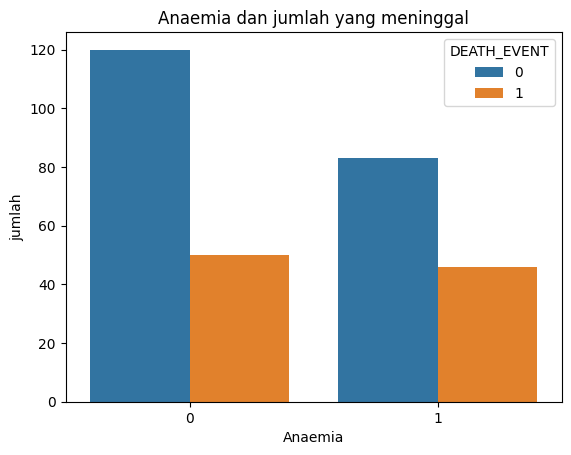

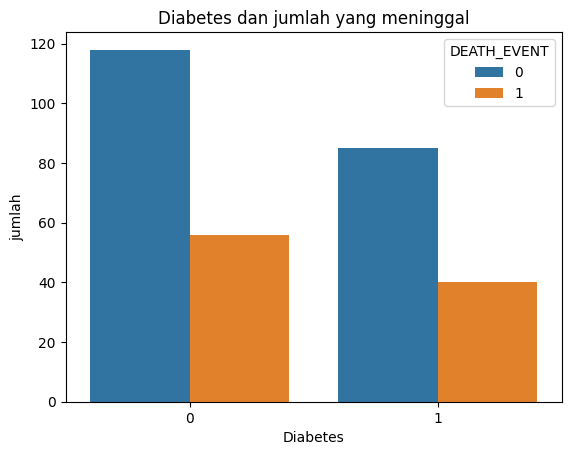

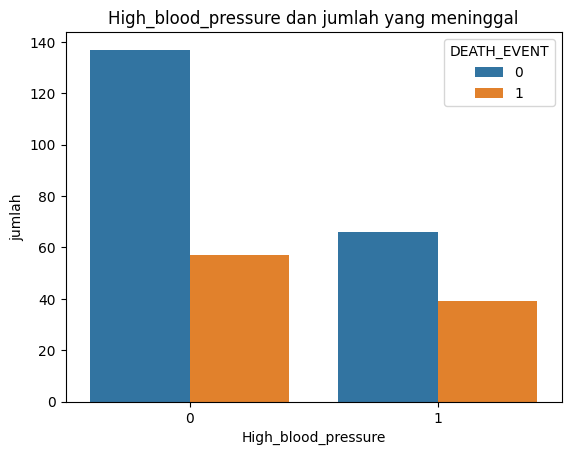

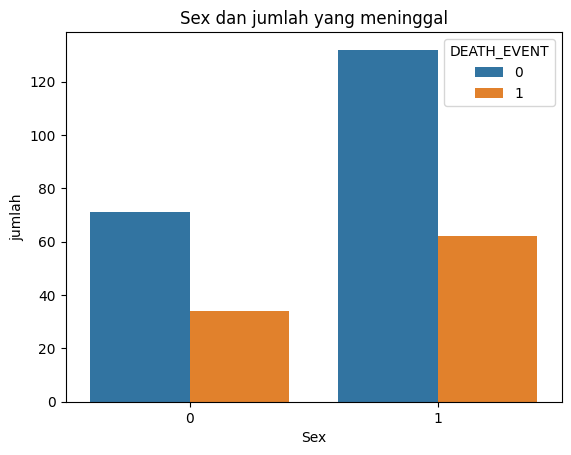

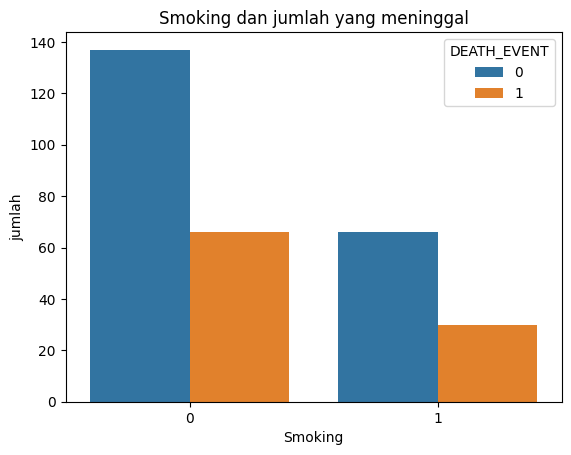

In [15]:
# define function to plot countplot
def died(param):
    g = sns.countplot(data=df, x=param, hue='DEATH_EVENT', orient='v')
    g.set(title=f'{param.capitalize()} dan jumlah yang meninggal', xlabel=param.capitalize(), ylabel='jumlah')
    plt.show()

# list of attributes
attributes=['anaemia', 'diabetes','high_blood_pressure', 'sex', 'smoking']

# plot countplot for each attribute
for attribute in attributes:
    died(attribute)

dari data diatas menunjukan bahwa jumlah apakah dengan history 'anaemia', 'diabetes','high_blood_pressure', 'sex', 'smoking' ini mempengaruhi terhadap failure attact ini, ternyata setelah kita bandingkan masing masing history tersebut dengan jumlah kematian dapat disimpulkan bahwa 

* pada gambar 1 yaitu kolom anemia dengan target di interpretasikan bahwa Anemia (kurangnya sel darah merah atau kadar hemoglobin yang rendah) dapat mempengaruhi kesehatan jantung, karena sel darah merah mengangkut oksigen ke jaringan dan organ tubuh, termasuk jantung. Jika terjadi kekurangan oksigen pada jantung, maka ini dapat meningkatkan risiko terjadinya gagal jantung.jika dilihat dari grafik, gagal jantung dan yang sehat menunjukan total kematian hampir sama dengan yang didiagnosis anemia dan tidak 

* pada dasarnya diabetes mellitus dapat mempengaruhi gagal jantung dengan cara meningkatkan risiko terjadinya kerusakan pembuluh darah dan saraf, yang dapat memperburuk kondisi gagal jantung. Diabetes juga dapat menyebabkan kerusakan pada miokardium (otot jantung) dan mengganggu fungsi jantung, yang dapat memperburuk gagal jantung. jika dilihat orang yang memiliki riwayat diabetes cukup berpotensi bahaya terhadap gagal jantung

* hipertensi atau tekanan darah tinggi dapat mempengaruhi gagal jantung. Tekanan darah yang tinggi menyebabkan jantung harus bekerja lebih keras untuk memompa darah ke seluruh tubuh, sehingga dapat menyebabkan kerusakan pada jantung dan meningkatkan risiko terjadinya gagal jantung. di representasikan dengan grafik high blood preassure.

* 1 direpresentasikan female dan 0 direpresentasikan male, dari grafik di atas dapat di lihat bahwa jumlah yang terkena gagal jantung adalah female 

* jika di lihat dari grafik di atas bahwa orang yang smking tidak berpengaruh terhadap potensi yang terkenaa gagal jantung. tetapi pada dasarnya Merokok dapat mempengaruhi terjadinya gagal jantung. Merokok dapat meningkatkan risiko terjadinya penyakit jantung dan pembuluh darah, yang pada gilirannya dapat menyebabkan gagal jantung. Merokok dapat merusak dinding pembuluh darah dan menyebabkan penyempitan arteri koroner yang menyuplai darah ke jantung. Akibatnya, jantung harus bekerja lebih keras untuk memompa darah ke seluruh tubuh, sehingga dapat menyebabkan kerusakan pada jantung dan meningkatkan risiko terjadinya gagal jantung.

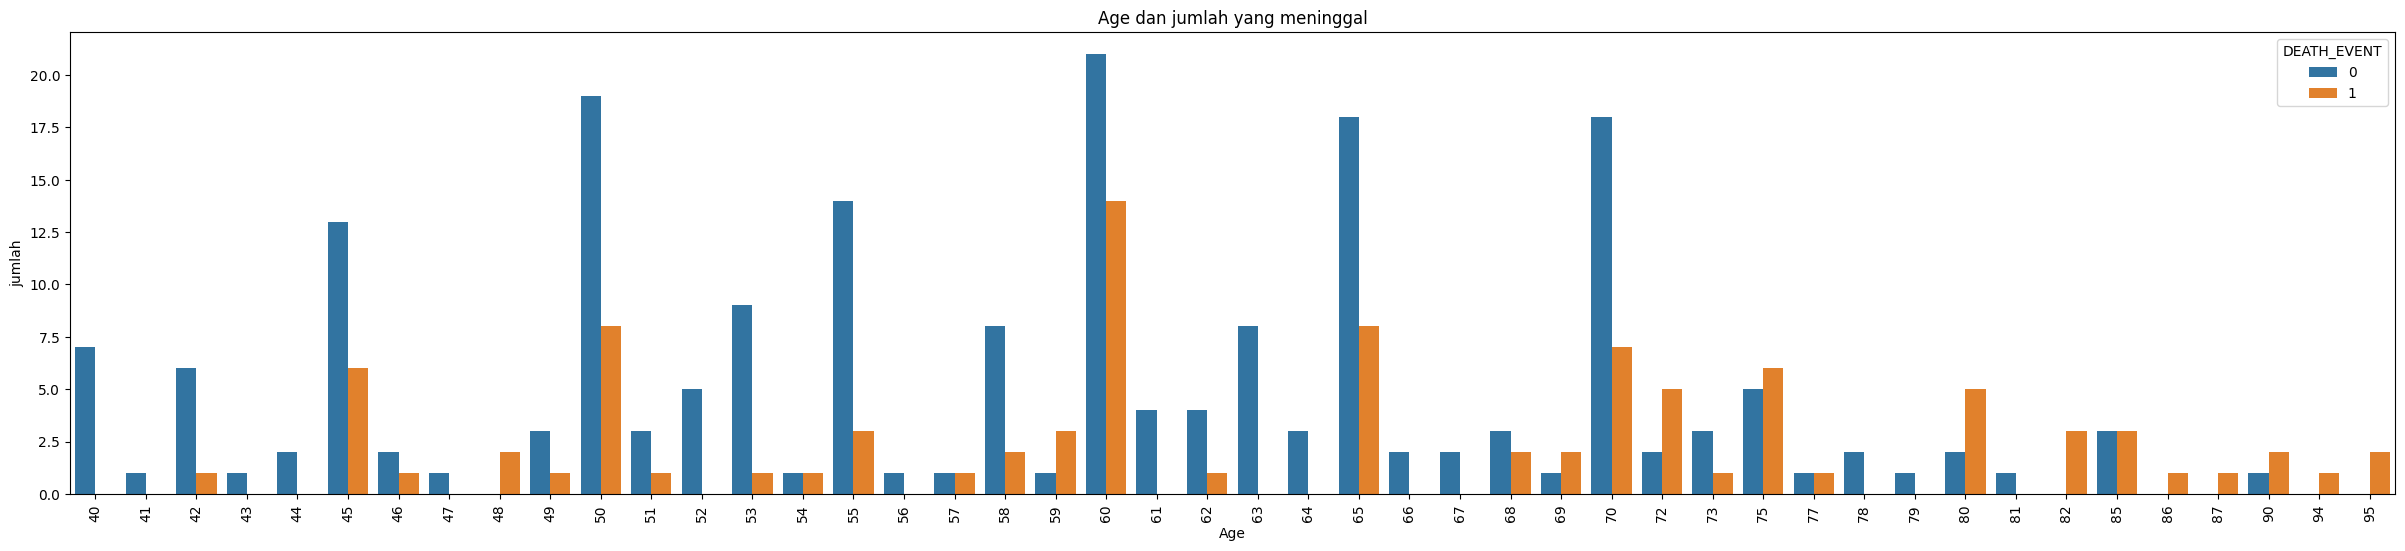

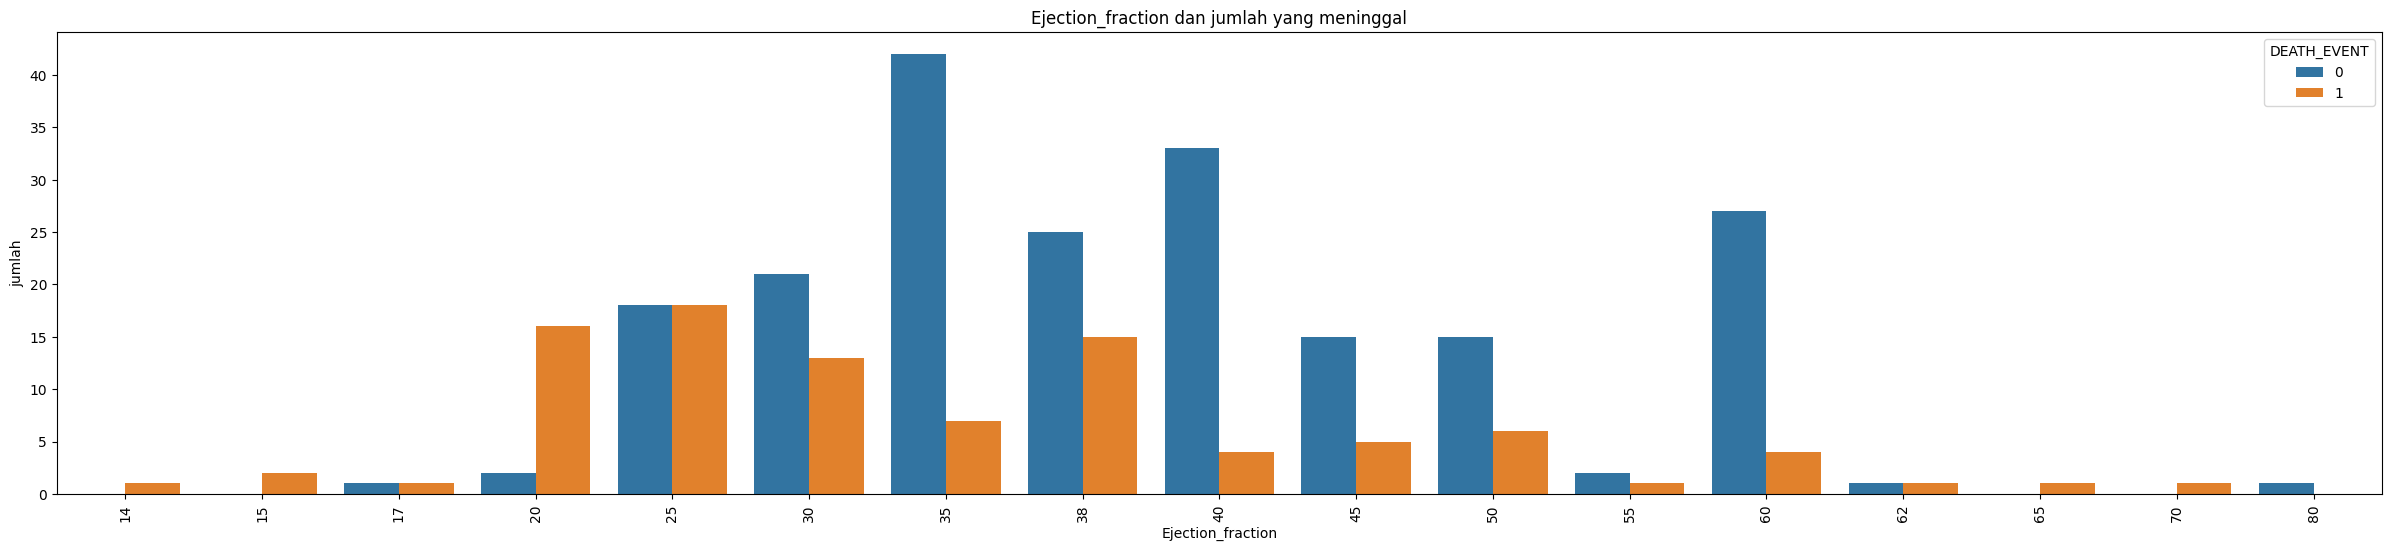

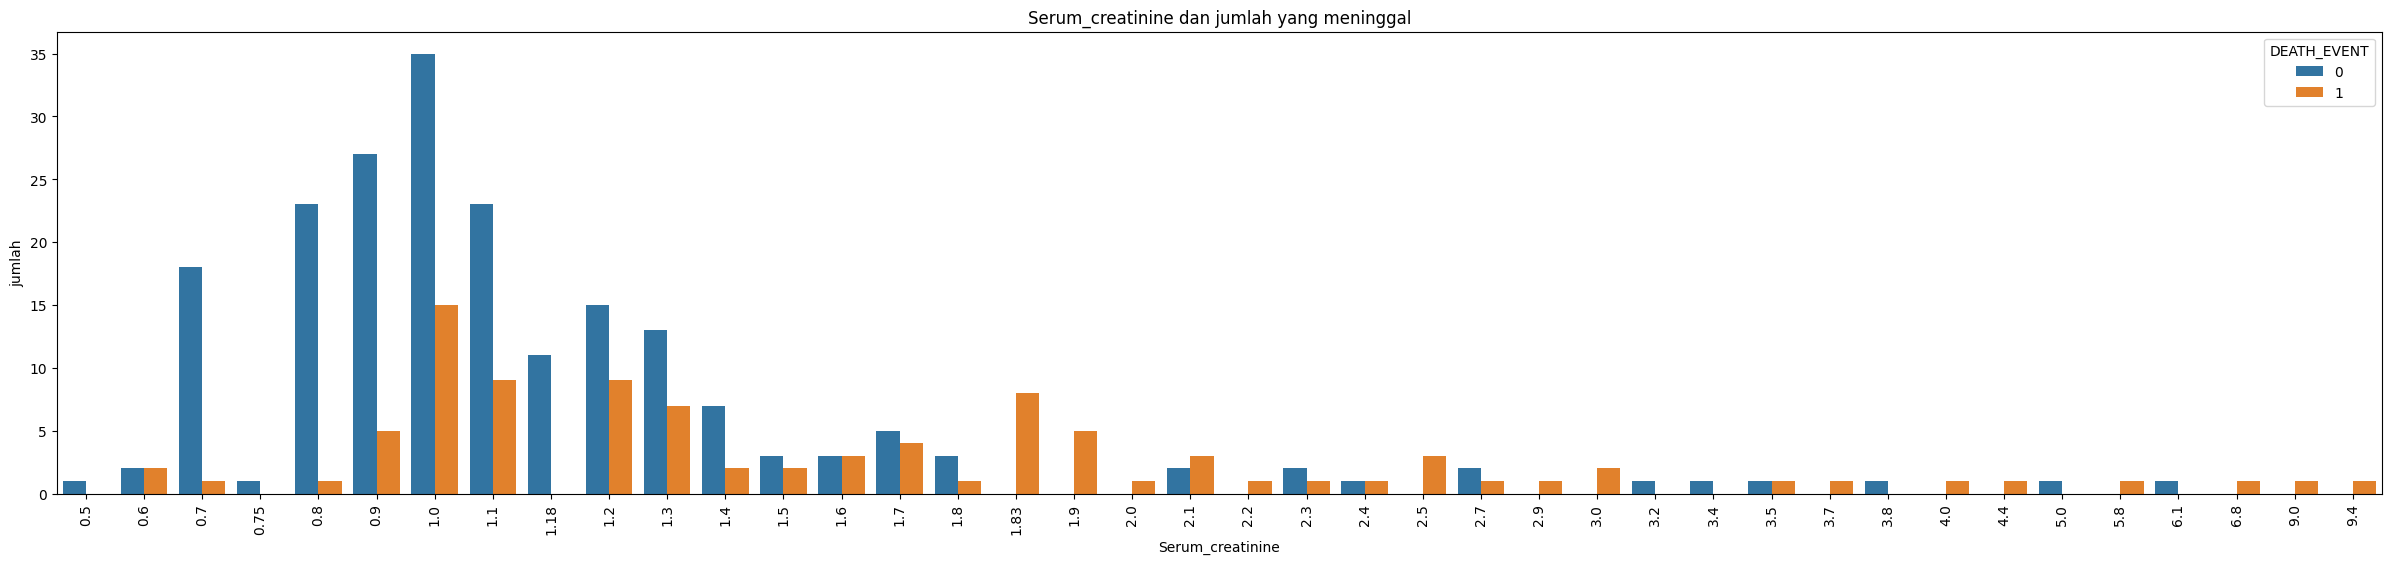

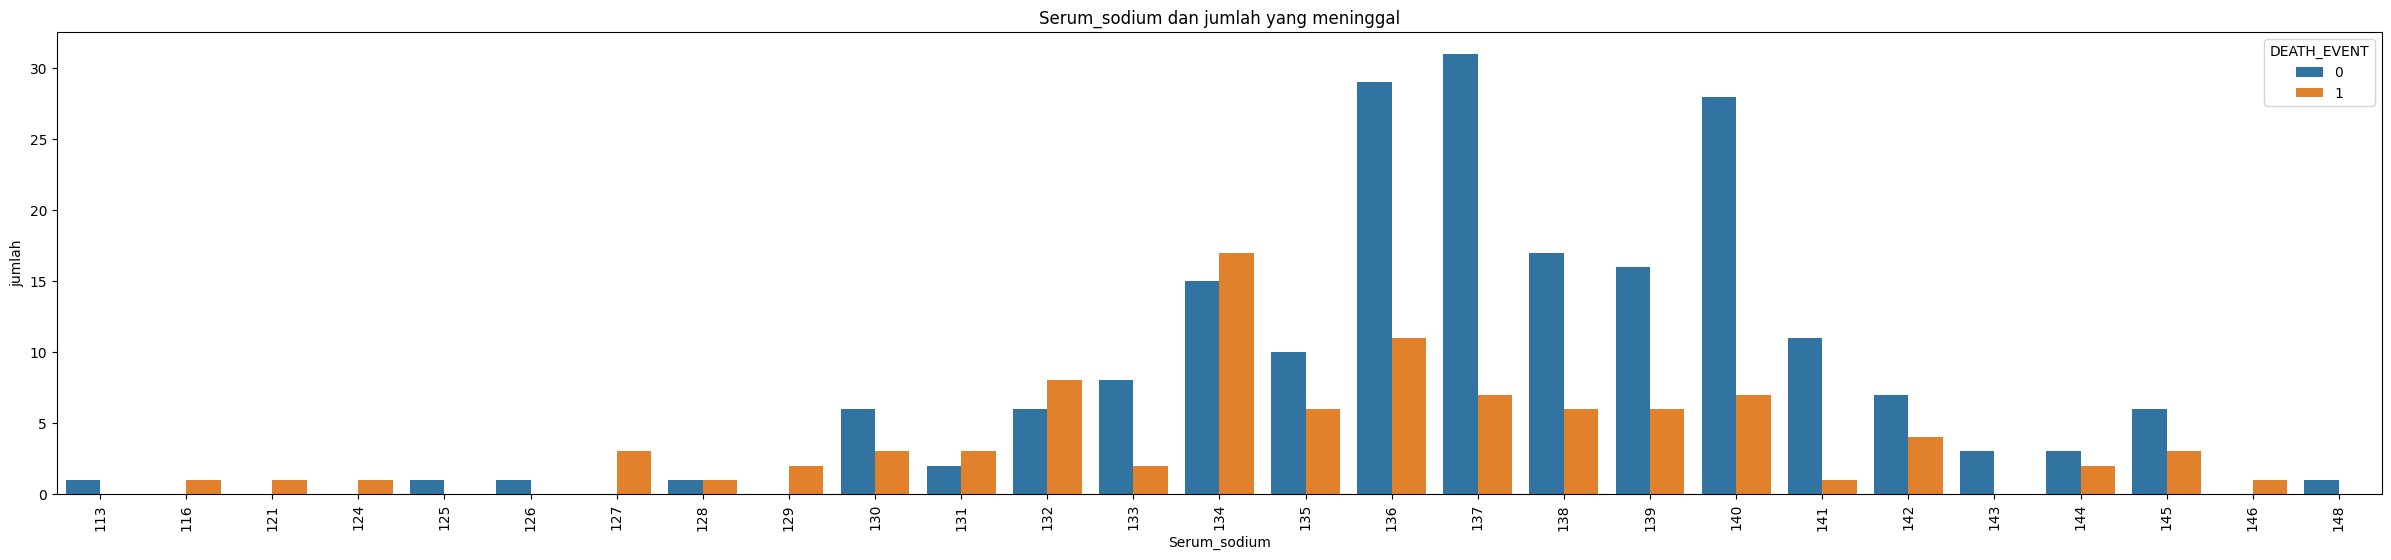

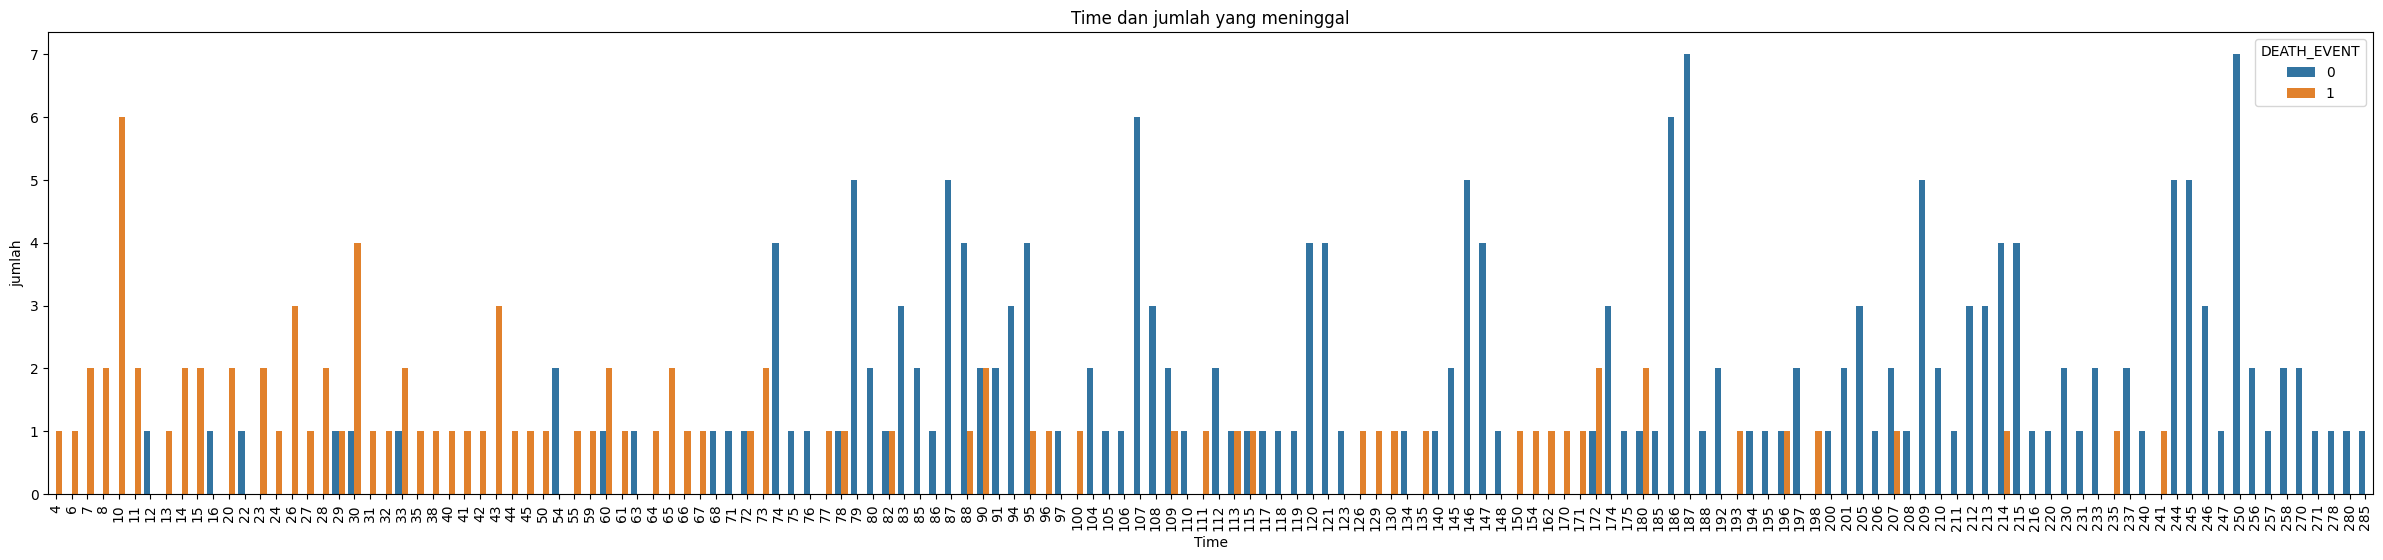

In [16]:
# define function to plot countplot
def died(param):
    g = sns.countplot(data=df, x=param, hue='DEATH_EVENT')
    g.set(title=f'{param.capitalize()} dan jumlah yang meninggal', xlabel=param.capitalize(), ylabel='jumlah')
    plt.xticks(rotation=90) # rotate x-tick labels
    plt.gcf().set_size_inches(30, 6) # set figure size
    plt.show()

# list of attributes
attributes=['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium','time']

# plot countplot for each attribute
for attribute in attributes:
    died(attribute)

* Age pada gambar pertama memberikan informasi bahwa yang menginggal di sebabkan oleh gagal jantung adalah rentan umur 50-65 tahun dengan total kematian terbanyak di umur 60 tahun
* fraksi normal :  50-70%, dari dataset ini yang meninggal dengan gagal jantung memiliki fraksi enjection di 20-45% yang di nyatakan nilai ini dibawah normal,  Nilai fraksi ejeksi di bawah normal kemungkinan adalah tanda gagal jantung.
* keratin serum normal : 0.5-1.5, jika dilihat dari gambar yang merepresentasikan keratin serum bahwa yang banyak nya meninggal itu terdapat di keratin serum 1 - 1.3 dan terdapat  dengan jumlah keratin 1.83 sangat tinggi total gagaljantung yang meninggal 
* serum_sodium normal : 135-145, jumlah orang meninggal dengan gagal jantung paling banyak pada pasien dengn serum sodium 134
* Time : time disini di representasikan dengan banyaknya orang cek kesehatan, semakin kecil cek kesehatan atau melakukan kontrol semakin tinggi posibility meninggal dalam artian semkin sedik melakukan chekup kesehatan kita engga tau keadaan tubuh kita, sehingga ketidaktahuan fisik kita dapat berfengaruh buruk. 


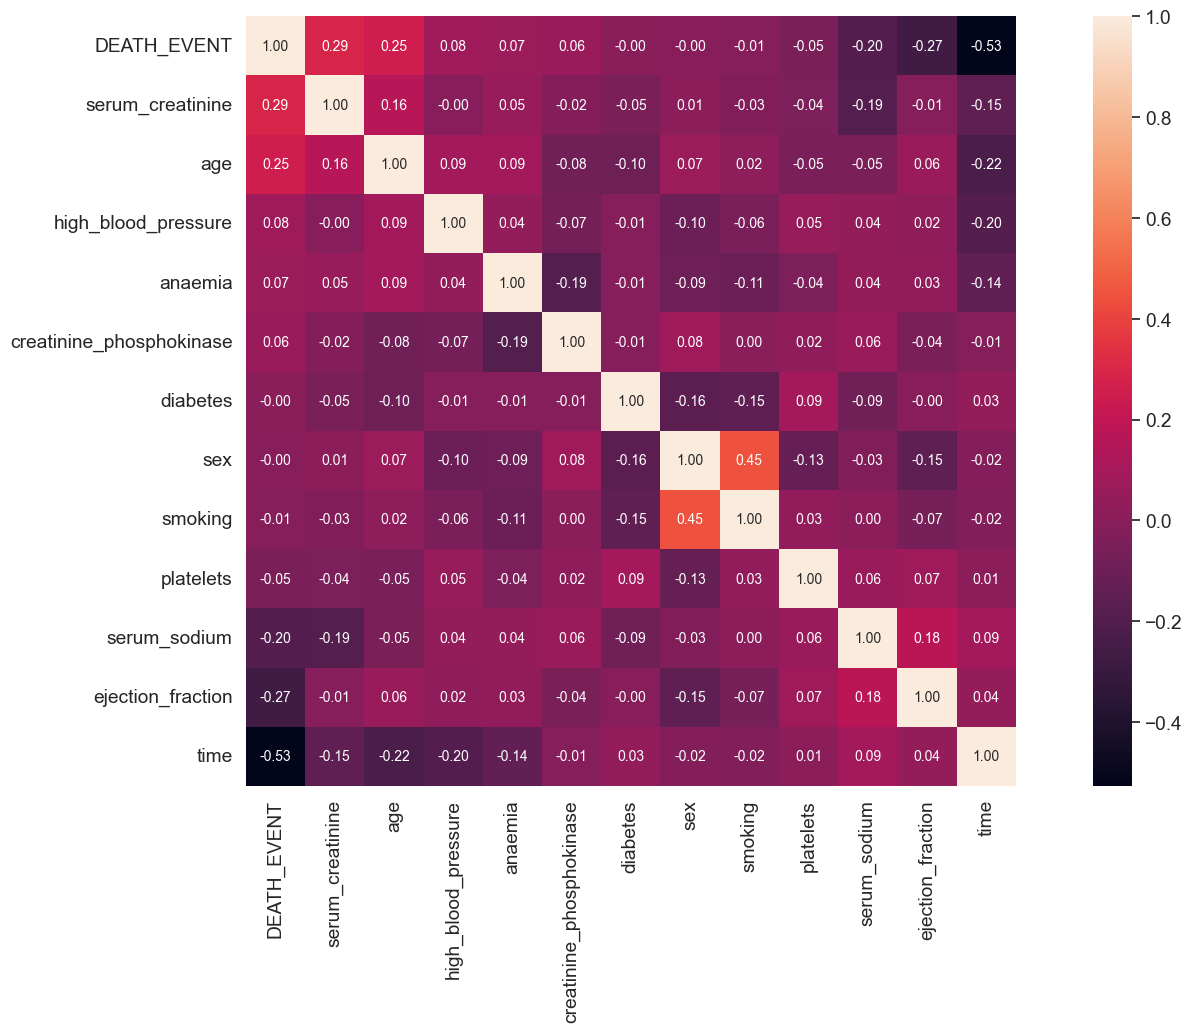

In [17]:
#cek korelasi numerikal 
k = 30 # number of variables dari heatmap
plt.figure(figsize=(20,10))
cols = df.corr().nlargest(k, 'DEATH_EVENT')['DEATH_EVENT'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Koefisien korelasi berkisar antara -1 hingga 1. Nilai -1 menunjukkan hubungan negatif sempurna antara kedua variabel, sementara nilai 1 menunjukkan hubungan positif sempurna antara kedua variabel. Nilai 0 menunjukkan bahwa tidak ada hubungan linier antara kedua variabel. dapat di lihat dari data di atas antara korelasi data target dengan lainya

In [18]:
#phik korelation untuk numerikal dan kategorikal
df.phik_matrix().nlargest(30,'DEATH_EVENT')['DEATH_EVENT']

interval columns not set, guessing: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


DEATH_EVENT                 1.000000
time                        0.772675
ejection_fraction           0.515675
age                         0.356298
serum_creatinine            0.332330
serum_sodium                0.214335
creatinine_phosphokinase    0.101787
high_blood_pressure         0.067031
anaemia                     0.018687
diabetes                    0.000000
platelets                   0.000000
sex                         0.000000
smoking                     0.000000
Name: DEATH_EVENT, dtype: float64

Data diatas menunjukan korelasi antara kolom target dengan kolom lainnya. 

In [19]:
df["DEATH_EVENT"].value_counts().reset_index()

,index,DEATH_EVENT
0,0,203
1,1,96


data diatas adalah proporsi dari data target, dari informasi disini di dapat bahwa data inbalance.   

<AxesSubplot: xlabel='DEATH_EVENT', ylabel='count'>

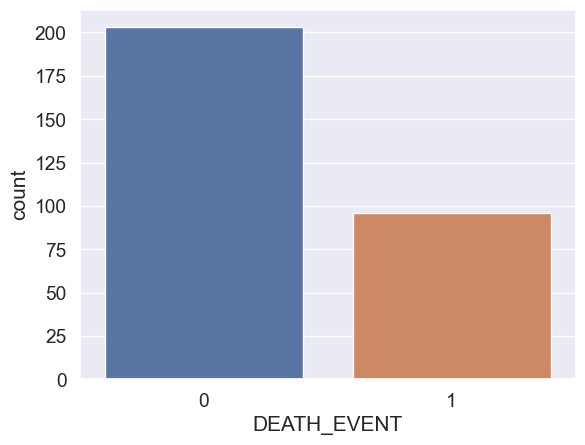

In [20]:
#melihat proporsi data dari target
sns.countplot(data=df,x='DEATH_EVENT')

Data di atas memberikan informasi bahwa kematian terhadap gagal jantung cukup tinggi yang di gambarkan dengan angka 1, dan yang healty di representasikan dengan (0) Gagal jantung adalah kondisi medis yang terjadi ketika jantung tidak mampu memompa darah dengan efektif ke seluruh tubuh. Kondisi ini dapat disebabkan oleh berbagai faktor seperti penyakit jantung koroner, tekanan darah tinggi, kelainan katup jantung, dan penyakit jantung lainnya.  

# v. Feature Engineering/Preprocessing

In [21]:
#feature selection
df1 = df.iloc[:,[0,11,4,7,2,5,12]]
df1 

,age,time,ejection_fraction,serum_creatinine,creatinine_phosphokinase,high_blood_pressure,DEATH_EVENT
0,42,65,15,1.3,250,0,1
1,46,100,17,2.1,168,1,1
2,65,8,20,2.7,160,0,1
3,53,43,20,1.4,91,1,1
4,50,186,20,1.0,582,1,0
...,...,...,...,...,...,...,...
294,63,147,60,1.2,122,0,0
295,45,186,60,1.0,308,1,0
296,70,186,60,0.9,97,1,0
297,53,215,60,1.0,446,1,0


berikut adalah feature yang di gunakan untuk di lakukan prediksi dimana model akan mempelajari feature di atas dan di lakukan uji coba.

In [22]:
#cek total uniq
for i in df1.columns:
    print('total variation {} as much {}'.format(i,df1[i].nunique()))

total variation age as much 46
total variation time as much 148
total variation ejection_fraction as much 17
total variation serum_creatinine as much 40
total variation creatinine_phosphokinase as much 208
total variation high_blood_pressure as much 2
total variation DEATH_EVENT as much 2


informasi di atas menunjukan jumlah uniq yang ada pada kolom feature.

In [23]:
# Calculating VIF (Multicollinearity)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [24]:
X = df1.iloc[:,:6]
calc_vif(X)

,variables,VIF
0,age,11.680387
2,ejection_fraction,9.559029
1,time,3.441316
3,serum_creatinine,2.881723
5,high_blood_pressure,1.594578
4,creatinine_phosphokinase,1.331479


Multikolinearitas adalah suatu kondisi di mana ada hubungan linier yang kuat antara dua atau lebih variabel independen dalam sebuah model regresi. batas yang digunakan untuk multicolarity adala 10, informasi diatas menunjukan hasil dari multikolarity sebuah data jika dilihat score diatas untuk kolom age memiliki nilai multicolarity yang melewati batas yang di tentukan, tapi dari asumsi saya karena age tiak begitu signifikan menjauhi dri batas nilai yang di jadikan batasan, masih bisa di gunakan untuk feature.

In [25]:
# define feature and target
X = df1.drop('DEATH_EVENT', axis=1)
y = df1['DEATH_EVENT']

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=13)

Memisahkan antara data train dan data test untuk dilakukan uji kinerja model pada data yang tidak dilihat sebelumnya (data test) dan memastikan bahwa model dapat melakukan prediksi yang akurat pada data baru. dapat kita ingat dalam EDA kita melihat bahwa informasi data yang terdapat dalam target inbalance maka solusinya ketika split data menggunakan *stratify=y* yaitu untuk membagi data menjadi train dan test set dapat membantu memastikan bahwa distribusi kelas yang tidak seimbang dipertahankan di kedua set.

In [26]:
#loop cek shape train & test
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(239, 6)
(60, 6)
(239,)
(60,)


Setelah data di split dapat terlihat 20% jumlah data test adalah 60 dan jumlah data train adalah 239

In [27]:
#menggabungkan nilai X_train dan y_train
df1_con = pd.concat([X_train, y_train], axis=1)

df1_con.shape

(239, 7)

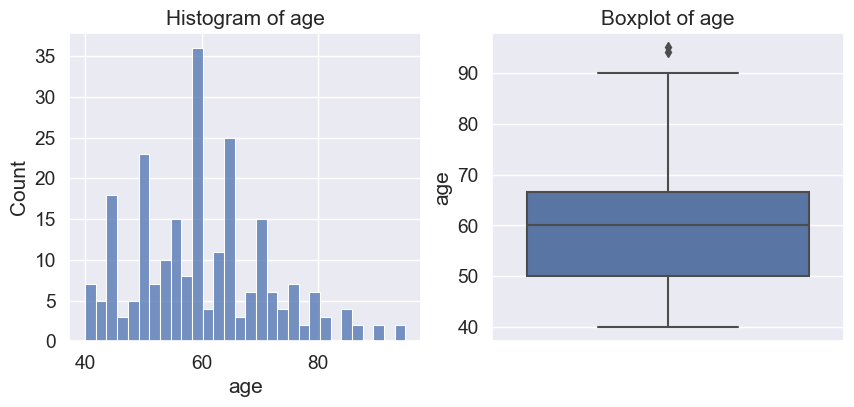


Skewness Value :  0.4241724021674246


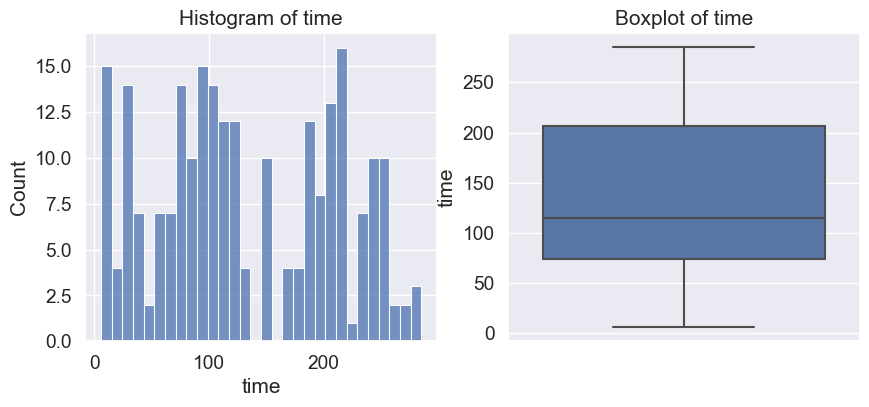


Skewness Value :  0.12780264559841178


In [28]:
#melihat distribusi & outlier pada kolom numerik 
num_col_unclear = df1_con[['age','time'
 ]]

# looping num_col_unclear
for col in num_col_unclear:
    # Define figure size
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df1_con[col], bins=30)
    plt.title('Histogram of {}'.format(col))
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df1_con[col])
    plt.title('Boxplot of {}'.format(col))
    

    plt.show()
    # diagnostic_plots(num_col)
    print('\nSkewness Value : ', df1[col].skew())

Data di atas menunjukan bahwa kolom teridentifikasi dengan distribusi normal yaitu dengan rentan -05 - 0.5.

In [29]:
#cek kelas majority dan minority
majority = df[df['DEATH_EVENT'] == 0]
minority = df[df['DEATH_EVENT'] == 1]

In [30]:
# banyaknya %proporsi kelas
kelas = len(majority)/len(minority)
kelas

2.1145833333333335

In [31]:
# smote pada data imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [32]:
X_train

,age,time,ejection_fraction,serum_creatinine,creatinine_phosphokinase,high_blood_pressure
86,45,257,55,0.8,615,0
127,72,65,25,1.0,110,0
28,50,28,35,1.0,249,1
192,73,195,35,1.3,582,1
114,72,59,20,1.3,364,1
...,...,...,...,...,...,...
93,85,94,60,3.2,102,0
242,55,147,40,0.7,835,0
134,50,90,25,1.6,369,0
147,64,214,25,2.4,143,0


SMOTE bekerja dengan membuat sampel sintetis baru pada kelas minoritas dengan cara mengambil sampel dari kelas minoritas yang ada dan membuat sampel sintetis baru berdasarkan kombinasi dari sampel-sampel tersebut.SMOTE membantu meningkatkan kinerja model dalam mengenali kelas minoritas dengan meningkatkan jumlah sampel pada kelas minoritas dan mengurangi ketidakseimbangan kelas dalam dataset

### Pipline

In [33]:
#pipline scaler
num_pipeline = Pipeline([
        ('winsorizer_gaussian', Winsorizer(capping_method='gaussian', tail='both', fold=3)),  #capping process
        ('imputer', SimpleImputer(strategy='median')), #imputer missing value
        ('scaler',  StandardScaler()) #scaling numerical 
    ])

num_tr = num_pipeline.fit_transform(X_resampled[['age','time']])
num_tr

array([[-1.44605275,  1.85038781],
       [ 0.97848099, -0.64303632],
       [-0.99706502, -1.12353992],
       [ 1.06827854,  1.0452196 ],
       [ 0.97848099, -0.72095582],
       [-1.08686257,  0.94132693],
       [-0.72767238,  0.25303798],
       [-0.99706502,  0.92834034],
       [-0.27868465,  1.49975004],
       [-0.72767238, -0.12357296],
       [-0.00929201,  1.27897811],
       [-1.89504048,  0.43485015],
       [-0.72767238, -0.92874116],
       [ 0.97848099, -0.04565345],
       [ 1.06827854,  1.27897811],
       [-0.09908956, -1.058607  ],
       [-0.09908956, -0.53914365],
       [ 0.34989817,  1.11015252],
       [-0.72767238,  1.22703178],
       [-0.54807729,  1.75948172],
       [-0.99706502, -1.11055334],
       [ 2.59483682,  1.83740122],
       [-1.89504048,  1.2919647 ],
       [ 0.7988859 , -1.14951309],
       [-0.54807729,  1.30495128],
       [-0.54807729, -0.70796924],
       [ 0.7988859 , -0.44823756],
       [ 0.34989817, -0.26642538],
       [-0.99706502,

 * StandardScalerr Scaling mengurangi pengaruh dari data yang memiliki nilai ekstrem atau outliers pada normalisasi data, biasanya standard scaling di gunakan pada distribusi normal dari numerical kategory.
 * Winsorizer Gaussian adalah sebuah teknik pre-processing data yang digunakan untuk menghilangkan nilai-nilai outlier pada dataset dengan mengganti nilai outlier dengan nilai-nilai tertentu yang terletak pada batas atas dan bawah distribusi normal atau Gaussian.
 * SimpleImputer digunakan untuk mengisi missing values dengan nilai yang diambil dari nilai median


In [34]:
#pipline ordinal encodeing
cat_1_pipeline = Pipeline([
        ('imputer_1', SimpleImputer(strategy='most_frequent')),
        ('ordinal_enc', OrdinalEncoder(categories='auto',handle_unknown='use_encoded_value', unknown_value=-1)) 
    ])

cat_1_tr = cat_1_pipeline.fit_transform(X_resampled[['creatinine_phosphokinase','serum_creatinine','ejection_fraction']]) #fit xtrain categ
cat_1_tr

array([[144.,   9.,  32.],
       [ 37.,  14.,   9.],
       [ 96.,  14.,  19.],
       [139.,  46.,  19.],
       [125.,  46.,   5.],
       [174.,   9.,  19.],
       [ 81.,   4.,  35.],
       [139.,  14.,   5.],
       [ 54.,  14.,  22.],
       [106., 100.,  19.],
       [ 22.,  54.,  22.],
       [131.,  12.,  14.],
       [ 28.,  54.,   5.],
       [170.,  72.,   9.],
       [179.,  12.,  24.],
       [142.,  23.,  35.],
       [  2.,   4.,   5.],
       [ 43.,  23.,  30.],
       [149.,  54.,  22.],
       [ 72.,  38.,  24.],
       [ 65.,  38.,  14.],
       [121.,  12.,  22.],
       [145.,  14.,  19.],
       [ 45.,  46.,  27.],
       [133.,   9.,  19.],
       [ 36.,  23.,  19.],
       [ 15.,   9.,  27.],
       [ 40.,  12.,  35.],
       [ 77.,   4.,  14.],
       [139.,  77.,  22.],
       [139.,  14.,   9.],
       [139.,  35.,  22.],
       [139.,  12.,  24.],
       [139.,  38.,   5.],
       [178., 110.,  27.],
       [ 88.,  46.,  30.],
       [ 60.,  14.,  24.],
 

Ordinal encoding adalah teknik representasi data kategorikalyang disesuaikan dengan urutan kategorinya atau sederhananya kategorikal yang memiliki tingkatan level. age dan education adalah kolom kategorikal dengan kategori yang akan di encode menggunakan OrdinalEncoder. alasan kolom 'creatinine_phosphokinase','serum_creatinine','ejection_fraction' di indikasi categorikal karena kolom ini berisi informasi berlevel seperti kategory yang mengindikasi gagal jantung misalnya: 
* ejection_fraction normal :  50-70%
* serum_creatinine normal : 0.5-1.5 
* creatinine_phosphokinase : 10-120 unit per liter (U/L)

In [35]:
#menggabungkan scaler & ordinal dalam 1 variable 
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['age','time']),
        ("cat_ord", cat_1_pipeline, ['creatinine_phosphokinase','serum_creatinine','ejection_fraction'])
        
    ])
#final x_train
train_final = full_pipeline.fit_transform(X_resampled)
train_final

array([[-1.44605275e+00,  1.85038781e+00,  1.44000000e+02,
         9.00000000e+00,  3.20000000e+01],
       [ 9.78480992e-01, -6.43036317e-01,  3.70000000e+01,
         1.40000000e+01,  9.00000000e+00],
       [-9.97065019e-01, -1.12353992e+00,  9.60000000e+01,
         1.40000000e+01,  1.90000000e+01],
       ...,
       [-8.17469927e-01, -1.07159359e+00,  9.80000000e+01,
         5.00000000e+01,  1.90000000e+01],
       [ 9.78480992e-01, -1.29236552e+00,  9.50000000e+01,
         5.10000000e+01,  3.00000000e+00],
       [-1.44605275e+00,  1.88105057e-01,  2.03000000e+02,
         2.30000000e+01,  1.30000000e+01]])

In [36]:
#final test 
test_final = full_pipeline.transform(X_test)
test_final

array([[ 3.49898170e-01,  1.03223302e+00, -1.00000000e+00,
         9.00000000e+00,  1.90000000e+01],
       [-4.58279744e-01,  1.68156221e+00, -1.00000000e+00,
         7.20000000e+01,  2.20000000e+01],
       [ 7.98885900e-01, -1.29236552e+00,  4.80000000e+01,
         1.40000000e+01,  9.00000000e+00],
       [-8.17469927e-01,  4.08876985e-01, -1.00000000e+00,
         1.20000000e+01,  2.40000000e+01],
       [ 7.98885900e-01, -1.05860700e+00, -1.00000000e+00,
         3.80000000e+01,  2.70000000e+01],
       [ 7.98885900e-01,  1.69454880e+00, -1.00000000e+00,
         2.30000000e+01,  1.90000000e+01],
       [ 1.69686136e+00, -3.57331470e-01, -1.00000000e+00,
         2.30000000e+01,  9.00000000e+00],
       [ 1.24787363e+00, -1.43521794e+00,  1.39000000e+02,
         7.80000000e+01,  5.00000000e+00],
       [ 7.98885900e-01, -5.26157061e-01, -1.00000000e+00,
         9.00000000e+00,  3.50000000e+01],
       [ 2.59483682e+00, -1.38327160e+00,  2.00000000e+00,
         8.20000000e+01

# vii. Model Training

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00       162

    accuracy                           1.00       324
   macro avg       1.00      1.00      1.00       324
weighted avg       1.00      1.00      1.00       324

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.67      0.74      0.70        19

    accuracy                           0.80        60
   macro avg       0.77      0.78      0.78        60
weighted avg       0.81      0.80      0.80        60



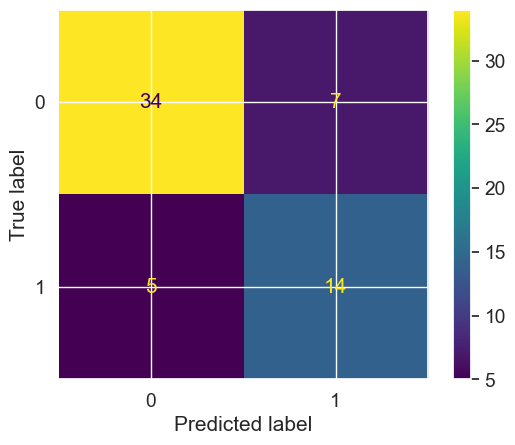

In [37]:
rfc = RandomForestClassifier()

## inisialisasi model Rfc
rfc.fit(train_final, y_resampled) #fit train

rfc_train = rfc.predict(train_final) #predik
rfc_test = rfc.predict(test_final)

print(classification_report(y_resampled, rfc_train)) #hasilpredik
print(classification_report(y_test, rfc_test))

cm = confusion_matrix(y_test, rfc_test, labels= rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)

disp.plot()
plt.show()

* True positive (TP): jumlah data yang diprediksi positif dan memang benar-benar positif. Dalam contoh di atas, terdapat 34 data yang diprediksi positif dan memang benar-benar positif.
* False positive (FP): jumlah data yang diprediksi positif tetapi sebenarnya negatif. Dalam contoh di atas, terdapat 7 data yang diprediksi positif tetapi sebenarnya negatif.
* True negative (TN): jumlah data yang diprediksi negatif dan memang benar-benar negatif. Dalam contoh di atas, terdapat 15 data yang diprediksi negatif dan memang benar-benar negatif.
* False negative (FN): jumlah data yang diprediksi negatif tetapi sebenarnya positif. Dalam contoh di atas, terdapat 4 data yang diprediksi negatif tetapi sebenarnya positif.

nilai kelas 0 dan 1 : dari prediksi probabilitas data, pada Data train  dan pada data test model Ini menunjukkan bahwa model tidak dapat menggeneralisasi dengan baik dan tidak memiliki kemampuan untuk mengatasi overfitting. alasan mengapa overfitting tetap terjadi pada model random forest yang menggunakan SMOTE adalah:
akan dilakukan hyperparameter tuning guna untuk mendapatkan hasil yang lebih baik. 

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       162
           1       0.85      0.96      0.90       162

    accuracy                           0.90       324
   macro avg       0.90      0.90      0.89       324
weighted avg       0.90      0.90      0.89       324

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        41
           1       0.62      0.84      0.71        19

    accuracy                           0.78        60
   macro avg       0.76      0.80      0.77        60
weighted avg       0.82      0.78      0.79        60



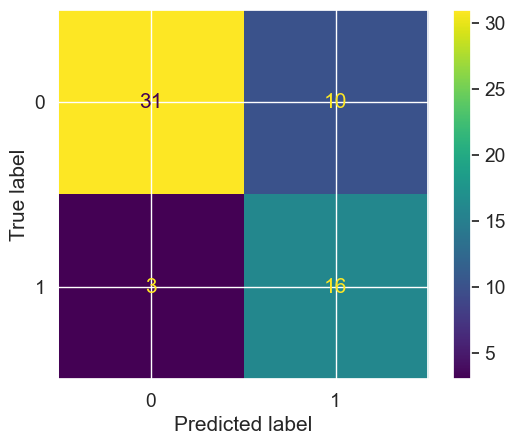

In [38]:
rfc1 = RandomForestClassifier(class_weight = {0: 1, 1:kelas}, n_estimators=100,max_depth=3, random_state=0) 
## inisialisasi model Rfc
rfc1.fit(train_final, y_resampled) #fit train

rfc_train = rfc1.predict(train_final) #predik
rfc_test = rfc1.predict(test_final)

print(classification_report(y_resampled, rfc_train)) #hasilpredik
print(classification_report(y_test, rfc_test))

cm = confusion_matrix(y_test, rfc_test, labels= rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)

disp.plot()
plt.show()

* True positive (TP): jumlah data yang diprediksi positif dan memang benar-benar positif. Dalam contoh di atas, terdapat 31 data yang diprediksi positif dan memang benar-benar positif.
* False positive (FP): jumlah data yang diprediksi positif tetapi sebenarnya negatif. Dalam contoh di atas, terdapat 10 data yang diprediksi positif tetapi sebenarnya negatif.
* True negative (TN): jumlah data yang diprediksi negatif dan memang benar-benar negatif. Dalam contoh di atas, terdapat 16 data yang diprediksi negatif dan memang benar-benar negatif.
* False negative (FN): jumlah data yang diprediksi negatif tetapi sebenarnya positif. Dalam contoh di atas, terdapat 3 data yang diprediksi negatif tetapi sebenarnya positif.

nilai kelas 0 dan 1 :setelah di lakukah hyper parameter tunning dari prediksi sebelumnya, pada Data train  dan pada data test model Ini masih menunjukkan bahwa model tidak dapat menggeneralisasi dengan baik dan tidak memiliki kemampuan untuk mengatasi overfitting. alasan mengapa overfitting tetap terjadi pada model random forest yang menggunakan SMOTE adalah:

Variasi pada dataset: SMOTE hanya menghasilkan sampel-sampel sintetis berdasarkan pola dari sampel-sampel minoritas yang ada pada dataset. Namun, model random forest masih dapat overfitting jika sampel-sampel sintetis yang dihasilkan terlalu mirip dengan sampel-sampel asli yang digunakan dalam training dataset. Oleh karena itu, variasi pada dataset dapat menjadi faktor penting dalam menghindari overfitting.

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       162
           1       0.91      0.91      0.91       162

    accuracy                           0.91       324
   macro avg       0.91      0.91      0.91       324
weighted avg       0.91      0.91      0.91       324

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        41
           1       0.67      0.63      0.65        19

    accuracy                           0.78        60
   macro avg       0.75      0.74      0.75        60
weighted avg       0.78      0.78      0.78        60



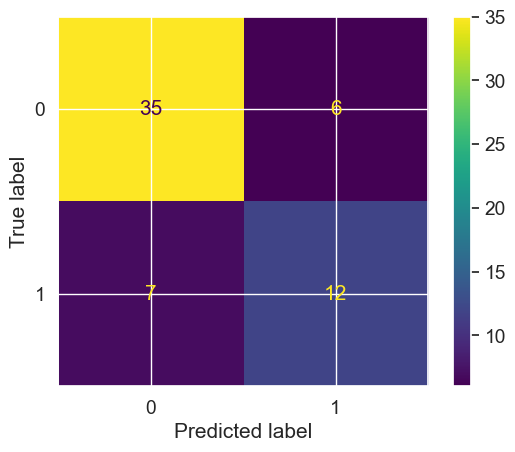

In [39]:
# inisialisasi model ada
ada = AdaBoostClassifier()
# inisialisasi model ada
ada.fit(train_final, y_resampled) #fit train 

ada_train = ada.predict(train_final) #predik
ada_test = ada.predict(test_final)

print(classification_report(y_resampled, ada_train)) #hasil predik
print(classification_report(y_test, ada_test))

cm = confusion_matrix(y_test, ada_test, labels= ada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ada.classes_)

disp.plot()
plt.show()

* True positive (TP): jumlah data yang diprediksi positif dan memang benar-benar positif. Dalam contoh di atas, terdapat 35 data yang diprediksi positif dan memang benar-benar positif.
* False positive (FP): jumlah data yang diprediksi positif tetapi sebenarnya negatif. Dalam contoh di atas, terdapat 6 data yang diprediksi positif tetapi sebenarnya negatif.
* True negative (TN): jumlah data yang diprediksi negatif dan memang benar-benar negatif. Dalam contoh di atas, terdapat 12 data yang diprediksi negatif dan memang benar-benar negatif.
* False negative (FN): jumlah data yang diprediksi negatif tetapi sebenarnya positif. Dalam contoh di atas, terdapat 7 data yang diprediksi negatif tetapi sebenarnya positif.

nilai kelas 0 dan 1 : dari prediksi probabilitas data, pada Data train  dan pada data test model Ini menunjukkan bahwa model tidak dapat menggeneralisasi dengan baik dan tidak memiliki kemampuan untuk mengatasi overfitting. alasan mengapa overfitting tetap terjadi pada model random forest yang menggunakan SMOTE adalah:

Variasi pada dataset: SMOTE hanya menghasilkan sampel-sampel sintetis berdasarkan pola dari sampel-sampel minoritas yang ada pada dataset. Namun, model random forest masih dapat overfitting jika sampel-sampel sintetis yang dihasilkan terlalu mirip dengan sampel-sampel asli yang digunakan dalam training dataset. Oleh karena itu, variasi pada dataset dapat menjadi faktor penting dalam menghindari overfitting.

In [40]:
skfold=StratifiedKFold(n_splits=2) # jumlah fold (n_splits) sebanyak 5
# checking cross validation score 
cv_rfc_model = cross_val_score(rfc, train_final, y_resampled, cv=skfold, scoring="recall")
cv_rfctun_model = cross_val_score(rfc1, train_final, y_resampled, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(ada, train_final, y_resampled, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
#loop dengan zip  menggabungkan beberapa iterables menjadi sebuah iterable tunggal
for cv,name in zip([cv_rfc_model,cv_ada_model,],['ada','rfc']): 
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

ada
recall - All - Cross Validation  :  [0.85185185 0.96296296]
recall - Mean - Cross Validation :  0.9074074074074074
recall - Std - Cross Validation  :  0.055555555555555525
recall - Range of Test-Set       :  0.8518518518518519 - 0.962962962962963
--------------------------------------------------
rfc
recall - All - Cross Validation  :  [0.72839506 0.90123457]
recall - Mean - Cross Validation :  0.8148148148148149
recall - Std - Cross Validation  :  0.08641975308641975
recall - Range of Test-Set       :  0.7283950617283952 - 0.9012345679012346
--------------------------------------------------
best model: ada
cross-val mean: 0.9074074074074074


Cross validation Metrik yang digunakan untuk evaluasi adalah recall, dan skema cross-validation yang digunakan adalah Stratified K-Fold.
Pada setiap iterasi, code akan menghitung nilai recall pada data train yang dipartisi menggunakan skema Stratified K-Fold. Setelah selesai melakukan cross validation pada masing-masing model, code akan menampilkan nilai recall rata-rata dan standar deviasi pada setiap fold, serta menampilkan rentang nilai recall yang dihasilkan pada setiap model.juga membandingkan nilai recall rata-rata dari semua model dan memilih model yang memiliki nilai recall rata-rata tertinggi sebagai model terbaik. dari data di atas dapat kita lihat best model dari hasil prediksi adalah ada dengan nilai cross-val mean: 0.93

# Model Inference 

# Saving Model 

In [41]:
# Simpan model rfc ke dalam file model_rfc.pkl
with open('model_rfc.pkl', 'wb') as file1:
    pickle.dump(rfc, file1)

# Simpan model ada ke dalam file model_knn.pkl
with open('model_ada.pkl', 'wb') as file2:
    pickle.dump(ada, file2)

# Simpan full pipeline ke dalam file model_full_pipeline.pkl
with open('model_full_pipeline.pkl', 'wb') as file3:
    pickle.dump(full_pipeline, file3)


# Over all Analysis

* kolom anemia dengan target di interpretasikan bahwa Anemia (kurangnya sel darah merah atau kadar hemoglobin yang rendah) dapat mempengaruhi kesehatan jantung, karena sel darah merah mengangkut oksigen ke jaringan dan organ tubuh, termasuk jantung. Jika terjadi kekurangan oksigen pada jantung, maka ini dapat meningkatkan risiko terjadinya gagal jantung.jika dilihat dari grafik, gagal jantung dan yang sehat menunjukan total kematian hampir sama dengan yang didiagnosis anemia dan tidak 

* pada dasarnya diabetes mellitus dapat mempengaruhi gagal jantung dengan cara meningkatkan risiko terjadinya kerusakan pembuluh darah dan saraf, yang dapat memperburuk kondisi gagal jantung. Diabetes juga dapat menyebabkan kerusakan pada miokardium (otot jantung) dan mengganggu fungsi jantung, yang dapat memperburuk gagal jantung. jika dilihat orang yang memiliki riwayat diabetes cukup berpotensi bahaya terhadap gagal jantung

* hipertensi atau tekanan darah tinggi dapat mempengaruhi gagal jantung. Tekanan darah yang tinggi menyebabkan jantung harus bekerja lebih keras untuk memompa darah ke seluruh tubuh, sehingga dapat menyebabkan kerusakan pada jantung dan meningkatkan risiko terjadinya gagal jantung. di representasikan dengan grafik high blood preassure.

* 1 direpresentasikan female dan 0 direpresentasikan male, dari grafik di atas dapat di lihat bahwa jumlah yang terkena gagal jantung adalah female 

* bahwa orang yang smking tidak berpengaruh terhadap potensi yang terkenaa gagal jantung. tetapi pada dasarnya Merokok dapat mempengaruhi terjadinya gagal jantung. Merokok dapat meningkatkan risiko terjadinya penyakit jantung dan pembuluh darah, yang pada gilirannya dapat menyebabkan gagal jantung. Merokok dapat merusak dinding pembuluh darah dan menyebabkan penyempitan arteri koroner yang menyuplai darah ke jantung. Akibatnya, jantung harus bekerja lebih keras untuk memompa darah ke seluruh tubuh, sehingga dapat menyebabkan kerusakan pada jantung dan meningkatkan risiko terjadinya gagal jantung.

* hyperparameter tunning dilakukan pada model rendom forest nilai kelas 0 dan 1 :setelah di lakukah hyper parameter tunning dari prediksi sebelumnya, pada Data train  dan pada data test model Ini masih menunjukkan bahwa model tidak dapat menggeneralisasi dengan baik dan tidak memiliki kemampuan untuk mengatasi overfitting. alasan mengapa overfitting tetap terjadi pada model random forest yang menggunakan SMOTE adalah: Variasi pada dataset: SMOTE hanya menghasilkan sampel-sampel sintetis berdasarkan pola dari sampel-sampel minoritas yang ada pada dataset. Namun, model random forest masih dapat overfitting jika sampel-sampel sintetis yang dihasilkan terlalu mirip dengan sampel-sampel asli yang digunakan dalam training dataset. Oleh karena itu, variasi pada dataset dapat menjadi faktor penting dalam menghindari overfitting.

* Best model yang di dapatkan adalah model ada, dengan nilai rata-rata 0.93 


## Conceptual Problems
Jawab pertanyaan berikut:

Jelaskan latar belakang adanya bagging dan cara kerja bagging !

* Bagging dilakukan dengan cara menggabungkan beberapa model machine learning yang kuat namun saling independen ke dalam satu model yang lebih kuat.teknik Bagging adalah untuk mengatasi overfitting, yaitu kondisi ketika model machine learning terlalu kompleks dan tidak mampu melakukan generalisasi dengan baik pada data yang belum pernah dilihat sebelumnya. Overfitting sering terjadi pada model machine learning yang kompleks seperti Decision Tree atau Neural Network. Dalam Bagging, pengambilan sampel acak dan pembuatan model yang saling independen dapat mengurangi kemungkinan overfitting pada model machine learning. 

Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

* Algoritma Random Forest dan algoritma Adaboosting adalah dua teknik ensemble learning yang digunakan untuk meningkatkan performa model machine learning. Meskipun keduanya digunakan untuk tujuan yang sama, namun ada perbedaan dalam cara kerja keduanya.

* Random Forest dilengkapi dengan teknik Bootstrap Aggregating (Bagging) untuk mengurangi overfitting. Teknik Bagging ini bekerja dengan melakukan pengambilan sampel acak dengan penggantian (sampling with replacement) terhadap data training yang tersedia dan membangun beberapa model machine learning yang saling independen.

* Adaboosting menggunakan teknik Boosting untuk memperbaiki model machine learning. Teknik Boosting ini bekerja dengan memberikan bobot yang lebih tinggi pada data training yang di-classify secara salah sehingga model machine learning berikutnya dapat lebih fokus pada data yang sulit di-classify.
* Perbedaan utama antara cara kerja Random Forest dan Adaboosting terletak pada jumlah model machine learning yang digunakan dan cara penggabungan hasil prediksi. Random Forest menggunakan banyak pohon keputusan yang saling independen, sementara Adaboosting menggunakan beberapa model machine learning yang lemah yang diproses secara berurutan.
